### **데이터 시각화**

공통 (환경설정 & 데이터 로드)

In [16]:
# 공통 (환경설정 & 데이터 로드) 및 문장 길이 분포 분석/시각화 통합

# ===================== 공통: 환경 세팅 및 데이터 로드 =====================
import os, re, math, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from transformers import AutoTokenizer # 토크나이저 임포트
import seaborn as sns # seaborn 임포트
import matplotlib.font_manager as fm # 폰트 매니저 임포트
from IPython.display import Image, display # 이미지 표시 임포트

# 경로 설정
DATA_DIR = r"/content/" # Corrected DATA_DIR to /content/
train_path = os.path.join(DATA_DIR, "train.csv")
test_path = os.path.join(DATA_DIR, "test.csv")
lex_path   = os.path.join(DATA_DIR, "general_data.txt")

# 결과 폴더
OUT_DIR = os.path.join(DATA_DIR, "outputs")
FIG_DIR = os.path.join(OUT_DIR, "figures")
TAB_DIR = os.path.join(OUT_DIR, "tables")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(TAB_DIR, exist_ok=True)

# 시각화 공통 함수
def savefig_tight(path):
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    print(f"📁 saved: {path}")
    plt.close()

# 폰트 설정 (이전 오류 해결 내용 반영)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
if os.path.exists(fontpath):
    fm.fontManager.addfont(fontpath) # 폰트를 강제로 추가합니다.
    plt.rc('font', family='NanumBarunGothic') # 재확인 차원에서 다시 설정
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ Matplotlib 폰트 설정 완료: NanumBarunGothic")
else:
    print(f"❌ 폰트 파일이 다음 경로에 존재하지 않습니다: {fontpath}\n한글 폰트가 깨져 보일 수 있습니다.")

# 데이터 로드
df_train = pd.read_csv(train_path)
df_train = df_train.dropna(subset=["conversation"])
df_train = df_train.drop_duplicates(subset=["class","conversation"]).reset_index(drop=True)

# general_data.txt 로드 및 통합
df_general = pd.read_csv(lex_path)
df_general = df_general.dropna(subset=["conversation"])
df_general = df_general.drop_duplicates(subset=["class","conversation"]).reset_index(drop=True)

df = pd.concat([df_train, df_general], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # 데이터 섞기

print("\n--- 통합 데이터프레임 미리보기 ---")
print(df.head())
print("\n--- 클래스 분포 ---", df["class"].value_counts())

# general_data.txt 파일 내용 미리보기
print(f"\n--- 'general_data.txt' 파일 내용 미리보기 ({lex_path}) ---")
if os.path.exists(lex_path):
    with open(lex_path, 'r', encoding='utf-8') as f:
        content = f.read()
    print(content[:500]) # 파일의 처음 500자만 출력하여 내용을 확인합니다.
    print("\n(파일 내용이 길어 일부만 출력했습니다.)")
else:
    print(f"❌ 'general_data.txt' 파일이 다음 경로에 존재하지 않습니다: {lex_path}")



✅ Matplotlib 폰트 설정 완료: NanumBarunGothic

--- 통합 데이터프레임 미리보기 ---
    idx      class                                       conversation
0  1480      갈취 대화  권사님 건축헌금으로 이만큼은 내주셔야죠.\n아이고 집사님 저희 가족한테 소중한 돈이...
1  1826      갈취 대화  이거 공개하면 넌 사회생활 못하겠지?\n왜 그러세요. 그러지 마세요\n글쎄 이걸 지...
2  2879      갈취 대화  야 니네집에 키위 농장한다며?\n어 응\n내가 키위 진짜 좋아하는데 좀 얻어먹어보자...
3   230      갈취 대화  친구야 저번에 돈 빌려줘서 너무 고마웠어\n아. 응.\n근데 내가 오늘도 깜빡하고 ...
4  3933  기타 괴롭힘 대화  야 넌 체육 수행평가 만점이라며?\n야 좋겠다 나도 다리 병신이었으면 얼마나 좋았을...

--- 클래스 분포 --- class
기타 괴롭힘 대화      1011
갈취 대화           973
직장 내 괴롭힘 대화     970
협박 대화           892
일반              800
Name: count, dtype: int64

--- 'general_data.txt' 파일 내용 미리보기 (/content/general_data.txt) ---
﻿idx,class,conversation
0,일반,"오늘 날씨 진짜 좋다. 그치? 하늘도 맑고. 응, 어디 놀러 가고 싶어지네. 주말에 근처 공원이라도 갈까? 오, 좋은 생각이야! 도시락 싸 갈까? ㅋㅋ 당연하지! 내가 김밥 쌀게. 헐, 대박! 그럼 난 샌드위치 담당."
1,일반,"점심 뭐 먹을래? 글쎄... 어제 치킨 먹어서 오늘은 좀 담백한 거. 그럼 파스타 어때? 근처에 맛집 생겼던데. 오, 좋아! 거기 가보자. 몇 시에 나갈까? 12시 반쯤? 사람 좀 빠질 때. 알았어, 그때 맞춰서 준비할게."
2,일반,"요즘 뭐 재미있는 

**1. 문장 길이 분포**

In [19]:
# ===================== 1. 문장 길이 분포 =====================
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
df["token_count"] = df["conversation"].apply(lambda x: len(tokenizer(x)["input_ids"]))

# 통계 요약
stats = df.groupby("class")["token_count"].agg(["count","mean","max","std", lambda x: np.percentile(x,95)])
stats.rename(columns={"<lambda_0>":"p95"}, inplace=True)
print(stats)

# 히스토그램
plt.figure(figsize=(6,4))
plt.hist(df["token_count"], bins=50)
plt.title("Token Length Distribution")
plt.xlabel("Token Count"); plt.ylabel("Frequency")
savefig_tight(os.path.join(FIG_DIR, "token_length_all.png"))

# 클래스별 박스플롯
plt.figure(figsize=(8,4))
groups = [g["token_count"] for _, g in df.groupby("class")]
labels = [cls for cls, _ in df.groupby("class")]
plt.boxplot(groups, labels=labels, showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.title("Token Length by Class")
savefig_tight(os.path.join(FIG_DIR, "token_length_by_class.png"))

# max_length 근거
p95 = np.percentile(df["token_count"],95)
recommended = int(p95*1.1)
with open(os.path.join(TAB_DIR,"recommended_max_length.txt"),"w",encoding="utf-8") as f:
    f.write(f"p95={p95:.1f}, recommended={recommended}")
print("🎯 추천 max_length:", recommended)


             count        mean  max        std    p95
class                                                
갈취 대화          973  128.998972  409  55.580189  230.8
기타 괴롭힘 대화     1011  129.292779  468  59.680597  240.5
일반             800   65.006250  145  27.505216  118.0
직장 내 괴롭힘 대화    970  135.989691  490  58.348406  243.1
협박 대화          892  145.928251  466  60.552464  263.0
📁 saved: /content/outputs/figures/token_length_all.png
📁 saved: /content/outputs/figures/token_length_by_class.png
🎯 추천 max_length: 258


/tmp/ipython-input-3228292886.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


**문장길이 분포**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np # numpy import 추가

# 'stats' DataFrame을 다시 계산하여 정의합니다.
stats = df.groupby("class")["token_count"].agg(["count","mean","max","std", lambda x: np.percentile(x,95)])
stats.rename(columns={"<lambda_0>":"p95"}, inplace=True)

# 'mean' 토큰 길이 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=stats.index, y="mean", data=stats, palette="viridis")
plt.title("Class-wise Mean Token Length")
plt.xlabel("Class")
plt.ylabel("Mean Token Count")
plt.xticks(rotation=45, ha="right")
savefig_tight(os.path.join(FIG_DIR, "token_length_mean_by_class.png"))

# 'p95' 토큰 길이 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=stats.index, y="p95", data=stats, palette="plasma")
plt.title("Class-wise 95th Percentile Token Length")
plt.xlabel("Class")
plt.ylabel("95th Percentile Token Count")
plt.xticks(rotation=45, ha="right")
savefig_tight(os.path.join(FIG_DIR, "token_length_p95_by_class.png"))

/tmp/ipython-input-3227246848.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats.index, y="mean", data=stats, palette="viridis")
/tmp/ipython-input-3227246848.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats.index, y="p95", data=stats, palette="plasma")


📁 saved: /content/outputs/figures/token_length_mean_by_class.png
📁 saved: /content/outputs/figures/token_length_p95_by_class.png


**평균 토큰 길이 & 95 백분위 토큰길이 시각화**

 max_length_이상치의 영향 최소화 적용

Displaying: /content/outputs/figures/token_length_mean_by_class.png


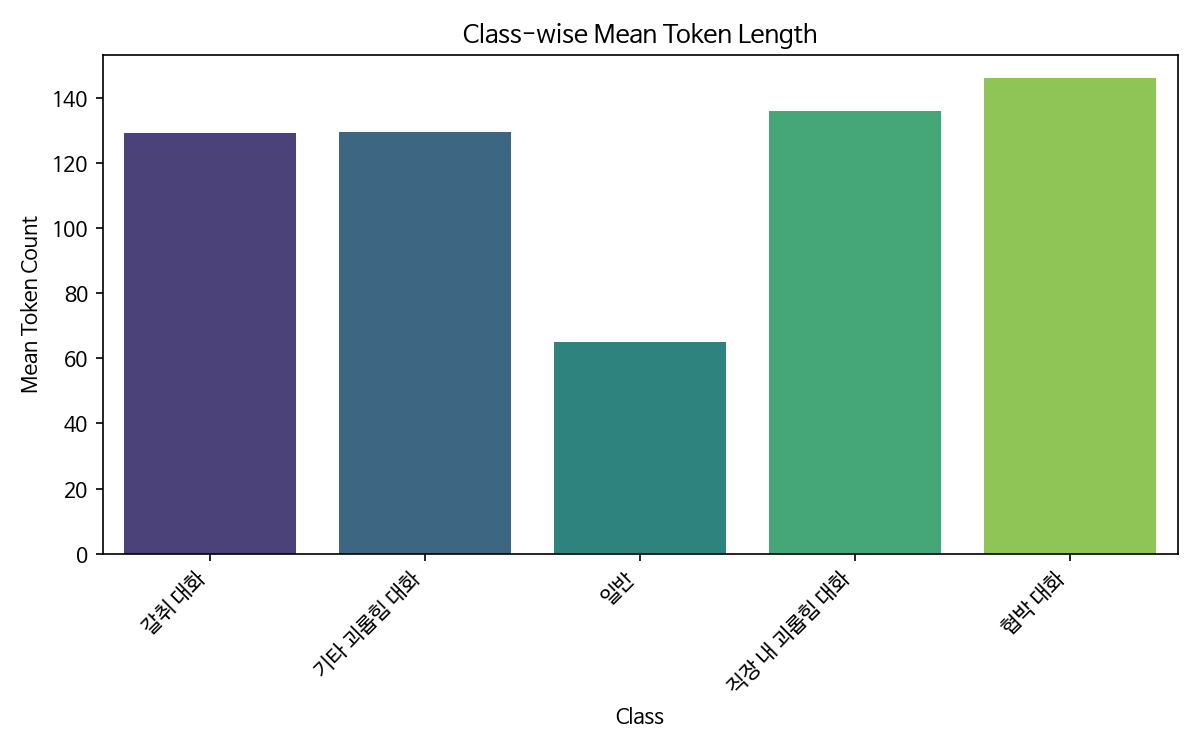

Displaying: /content/outputs/figures/token_length_p95_by_class.png


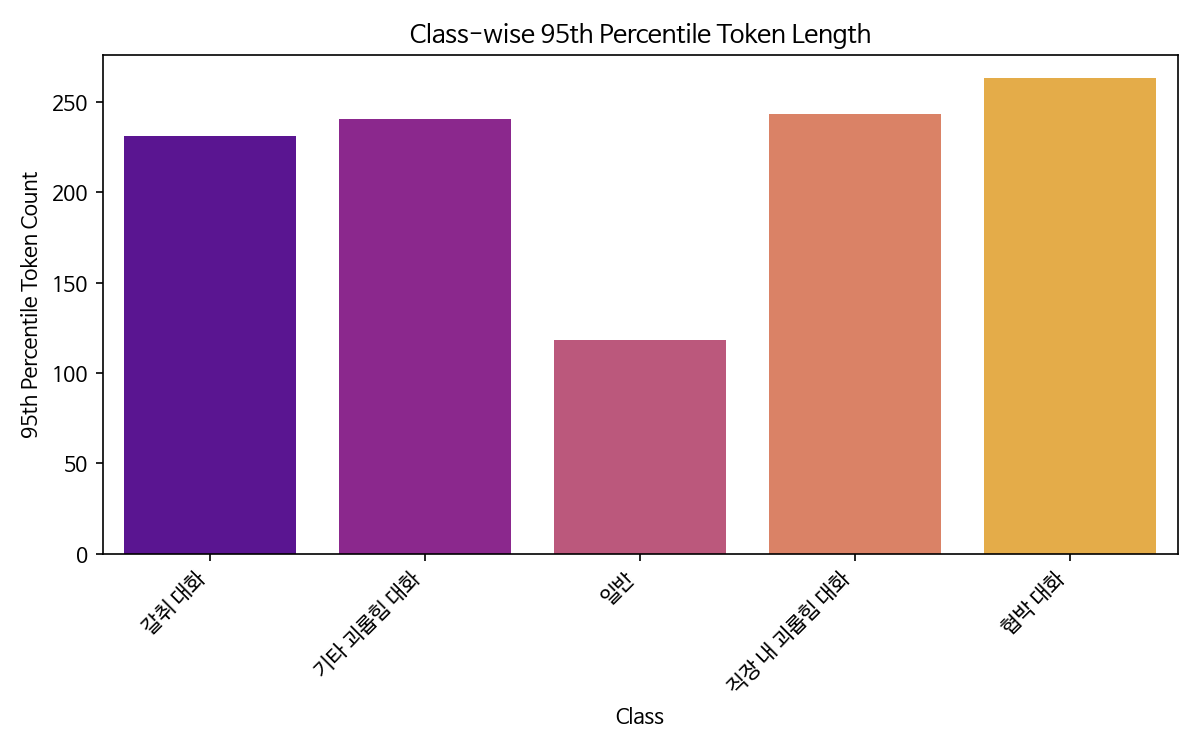

In [21]:
from IPython.display import Image, display
import os

# 평균 토큰 길이 이미지 표시
image_path_mean = os.path.join(FIG_DIR, "token_length_mean_by_class.png")
if os.path.exists(image_path_mean):
    print(f"Displaying: {image_path_mean}")
    display(Image(filename=image_path_mean))
else:
    print(f"Image not found: {image_path_mean}")

# 95 백분위수 토큰 길이 이미지 표시
image_path_p95 = os.path.join(FIG_DIR, "token_length_p95_by_class.png")
if os.path.exists(image_path_p95):
    print(f"Displaying: {image_path_p95}")
    display(Image(filename=image_path_p95))
else:
    print(f"Image not found: {image_path_p95}")

**문장 길이 빈도 전체 분산 시각화**

Displaying: /content/outputs/figures/token_length_all.png


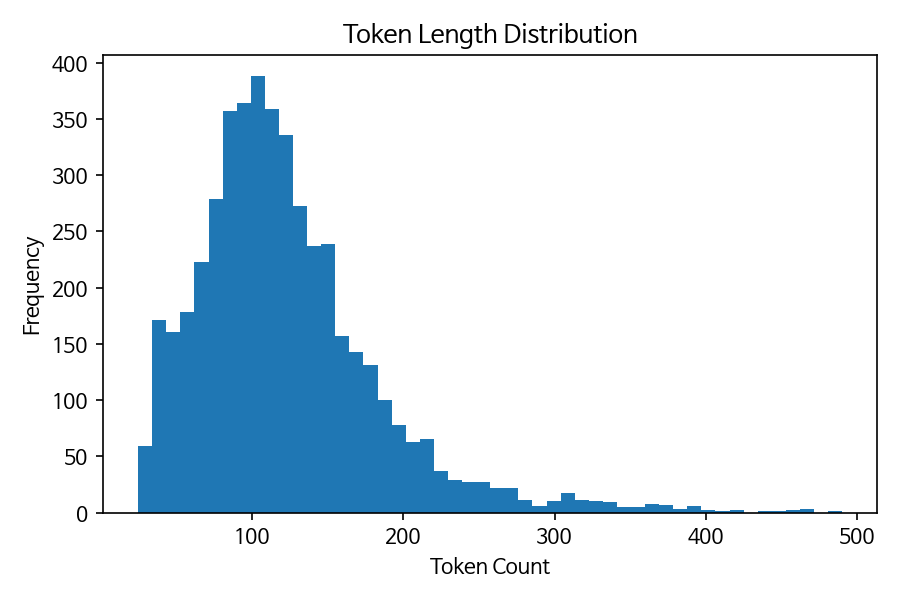

In [14]:
from IPython.display import Image, display
import os

# 토큰 길이 전체 분포 이미지 표시
image_path_all = os.path.join(FIG_DIR, "token_length_all.png")
if os.path.exists(image_path_all):
    print(f"Displaying: {image_path_all}")
    display(Image(filename=image_path_all))
else:
    print(f"Image not found: {image_path_all}")

Displaying: /content/outputs/figures/token_length_by_class.png


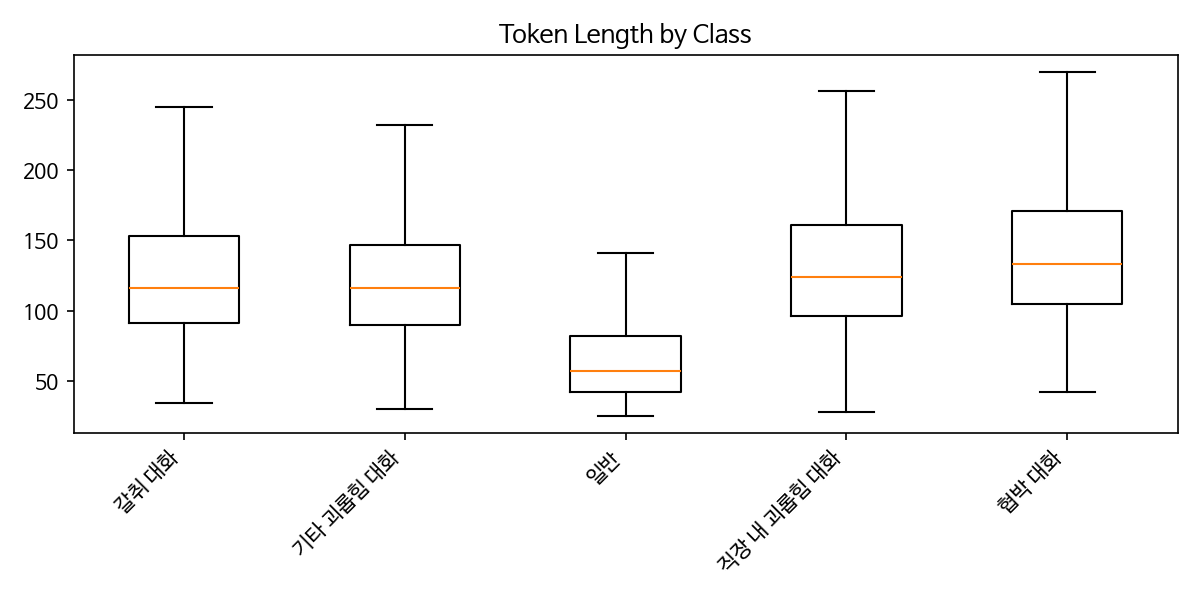

In [15]:
from IPython.display import Image, display
import os

# 클래스별 토큰 길이 박스플롯 이미지 표시
image_path_by_class = os.path.join(FIG_DIR, "token_length_by_class.png")
if os.path.exists(image_path_by_class):
    print(f"Displaying: {image_path_by_class}")
    display(Image(filename=image_path_by_class))
else:
    print(f"Image not found: {image_path_by_class}")

**일반 문장길이가 짧고, 협박이 긴 이유**


'일반' 대화의 문장 길이가 짧은 이유:

일상적이고 간결함: '일반' 대화는 대부분 일상적인 주제를 다루며, 안부, 간단한 정보 교환, 의견 표현 등 간결하고 직접적인 소통이 많습니다. 복잡한 설명이나 감정적인 설득이 필요한 경우가 적기 때문에 자연스럽게 짧아지는 경향이 있습니다.
정보 전달의 효율성: 불필요한 수식이나 배경 설명 없이 핵심 내용만 전달하는 경우가 많습니다.


'협박 대화'의 문장 길이가 긴 이유:

위협의 명확화 및 구체화: 협박은 상대방에게 두려움이나 불이익을 주겠다는 의도를 명확히 전달해야 합니다. 단순히 '널 해치겠다'고 말하는 것보다, '만약 ~하지 않으면, 너에게 ~한 불이익이 있을 것이다'와 같이 상황, 조건, 결과 등을 상세히 설명해야 효과적이기 때문에 문장이 길어집니다.
심리적 압박: 협박하는 측은 상대방에게 자신의 의지를 각인시키고 심리적으로 압박하기 위해 반복적이거나 수사적인 표현, 협박의 근거를 제시하는 등 길고 상세한 발화를 사용하는 경향이 있습니다.
정보 요구 및 상황 설명: 협박의 맥락을 형성하거나, 특정 정보를 요구하는 과정에서 대화의 길이가 길어질 수 있습니다.
결과적으로 대화의 목적과 성격이 토큰 길이에 큰 영향을 미친다고 볼 수 있습니다.

일반대화의 짧은 길이 =  합성데이터의 결과

아래의 합성 대이터의 결과로 인해 상대적으로 짧은 일반대화의 길이가 생성 된것으로 보임.

생성 조건에 제약이 많고 감정과 구어체를 제거 금지 했기에 더 더욱.

너는 한국어 대화 데이터를 분석하고 새로 생성하는 언어모델이다.
다음 조건을 지키며 “일반적인 일상 대화”만 생성하고,
대화는 200개 생성하라

[생성 조건]
1. 대화는 2인 이상, 5~8턴 정도.
2. 주제는 일상·취미·날씨·식사·관계 등.
3. 금전 요구, 협박, 위협, 직장 내 강요, 비하 발언 금지.
4. 욕설은 유머/감탄 수준만 허용 (공격 의도 불가).
5. 감정은 중립~긍정. 갈등이나 명령형은 제외.
6. ‘~했어’, ‘~그래’, ‘~알았어’ 등의 구어체 자연스러움 유지.
7. CSV 형식: id,conversation
   예시:
   g_001,야 오늘 뭐 먹을래? 나는 치킨이 땡기는데. 그래 치킨 먹자 오랜만이네.

[참고 패턴]
- 대화 주제: 친구, 날씨, 선물, 취업, 음악, 주말 계획
- 허용 표현: “야”, “그치”, “알았어”, “ㅋㅋ”, “헐”, “대박”
- 금지 표현: “돈”, “빌려”, “죽여”, “가만 안 둬”